# Neural Network

MULTICLASS CLASSIFICATION IMPLEMENTED ON THE MNIST HAND-WRITTEN DATA RECOGNITION SET 

In [1]:
#tf_env 

import math
import random
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset 

from sklearn.model_selection import train_test_split
from keras.datasets import mnist


### Data Handling

**Loading the data**

In [2]:
(Xtrain, y_train), (Xtest, y_test) = mnist.load_data()

def plot(Xtrain,ytrain):

    fig = plt.figure(figsize=(10,7))
    for i in range(15):  
        ax = fig.add_subplot(3, 5, i+1)
        ax.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
        ax.set_title('Label (y): {y}'.format(y=ytrain[i]))
        plt.axis('off')

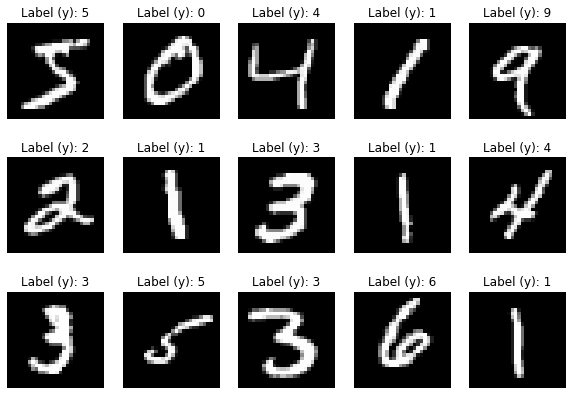

In [3]:
plot(Xtrain,y_train)

**Configuring input**

Every image is just 28x28 pixels. To input an image into the model we will flatten this 28x28 into a vector of length 784(28*28) and these 784 numbers which just pixels represent the n features for every example(image) in the dataset.

In [4]:
X_train = Xtrain.reshape(60000,28*28)
X_test = Xtest.reshape(10000,28*28)

**One hot encoding the target variable**

The labels for this dataset are numerical values from 0 to 9 — but it’s important that our algorithm treats these as items in a set, rather than ordinal values.

In [5]:
ytrain_enc = np.array(pd.get_dummies(y_train))
ytest_enc = np.array(pd.get_dummies(y_test))

In [10]:
print(y_train[0])

5


In [9]:
print(ytrain_enc[0])

[0 0 0 0 0 1 0 0 0 0]


### Implementation

**Activation Functions**

In [33]:
# z = Wx + b

def f(z):
    return z

def sigmoid(z):
    A = 1/(1+math.exp(-z))
    return A, z

def tanh(z):
    return 2/(1+math.exp(-2*z)) - 1

def relu(z):
    return np.maximum(0.0, z)


**Network**

In [29]:
class NN():

    def __init__ (self,sizes,epochs=10, l_rate=0.001):

        self.sizes = sizes # sizes = np.array([784,128,64,10])
        self.epochs = epochs
        self.l_rate = l_rate

        self.param = self.initialization()

    def initialization(self):

        np.random.seed(0)
        param = {}

        for l in range(1,len(self.sizes)):
            param['W'+str(l)] = np.random.rand(self.sizes[l],self.sizes[l-1])
            param['b'+str(l)] = np.random.rand(self.sizes[l],1)

        return param
        
    def forward_prop(self,x_train):

        A = x_train
        L = len(self.param) // 2

        caches = np.array([])

        for l in range(1,L+1):
            A_prev = A

            Z = A_prev @ param['W'+str(l)] + param['b'+str(l)]

            A, activation_cache = sigmoid(Z)
            

            


In [32]:
    sizes = np.array([784,128,64,10])
    nn = NN(sizes)

    nn.param['W1']

array([[5.48813504e-01, 7.15189366e-01, 6.02763376e-01, ...,
        4.26904360e-01, 8.42854888e-01, 8.18033306e-01],
       [1.02413758e-01, 1.56383349e-01, 3.04198692e-01, ...,
        3.40100746e-01, 6.85968348e-02, 2.28907600e-01],
       [3.57983937e-01, 4.35141987e-01, 5.90926726e-01, ...,
        9.03285521e-04, 6.98143030e-02, 2.26491278e-01],
       ...,
       [8.19256962e-01, 3.07418809e-01, 9.85170298e-01, ...,
        7.97284578e-01, 7.16974140e-01, 4.66908106e-01],
       [9.46473226e-01, 3.45924566e-01, 2.67507997e-01, ...,
        4.63363035e-01, 3.77216466e-01, 7.99931083e-01],
       [7.30998355e-01, 3.09465228e-01, 6.77624810e-01, ...,
        1.86861015e-01, 2.67379767e-01, 4.18513248e-01]])